<a href="https://colab.research.google.com/github/beliya4156/EyeDisease/blob/master/DR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/drive/My Drive/Diabetic Retinopathy/retinopathy_dataset.zip"

In [ ]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return 100*diagonal_sum / sum_of_all_elements 

***PreProcessing***

In [ ]:
#Creating .csv file from image dataset
from PIL import Image
import numpy as np
import sys
import os
import csv

#Useful function
def createFileList(myDir, format='.png'):
  fileList = []
  print(myDir)
  for root, dirs, files in os.walk(myDir, topdown=False):
      for name in files:
          if name.endswith(format):
              fullName = os.path.join(root, name)
              fileList.append(fullName)
  return fileList

# load the original image
l = ["Mild","Moderate","No_DR","Proliferate_DR","Severe"]
for i in l:
  myFileList = createFileList('/content/retinopathy_dataset/'+i+'/')

  for file in myFileList:
      print(file)
      img_file = Image.open(file)
      # img_file.show()

      # get original image parameters...
      width, height = img_file.size
      format = img_file.format
      mode = img_file.mode

      # Make image Greyscale
      img_grey = img_file.convert('L')
      #img_grey.save('result.png')
      #img_grey.show()

      # Save Greyscale values
      value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
      value = value.flatten()
      value = value.tolist()
      value.append(i)
      value = np.asanyarray(value)
      print(value)
      with open("/content/retinopathy_dataset/img_pixels.csv", 'a') as f:
          writer = csv.writer(f)
          writer.writerow(value)

In [ ]:
# Importing the dataset
import pandas as pd
dataset = pd.read_csv('/content/retinopathy_dataset/img_pixels.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_trai, X_tes, y_trai, y_tes = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trai = sc.fit_transform(X_trai)
X_tes = sc.transform(X_tes)

In [ ]:
Classifier = []
Accuracy = []
CM = []

**Creating RandomForest Classifier**

In [ ]:
# Training the Random Forest Classification model on the Training set
Classifier.append("RandomForest")
X_train, X_test, y_train, y_test=X_trai, X_tes, y_trai, y_tes
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = RF_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
CM.append(confusion_matrix(y_test, y_pred))

In [ ]:
Accuracy.append(accuracy(CM[-1]))

**Creating Decision Tree Classifier**

In [ ]:
# Training the Decision Tree Classification model on the Training set
Classifier.append("Dicision Tree")
X_train, X_test, y_train, y_test=X_trai, X_tes, y_trai, y_tes
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Predicting the Test set results
y_pred = DT_classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
CM.append(confusion_matrix(y_test, y_pred))

In [ ]:
Accuracy.append(accuracy(CM[-1]))

**Creating Logistic Regression Classifier**

In [ ]:
# Training the Logistic Regression model on the Training set
Classifier.append("Logistic Regression")
X_train, X_test, y_train, y_test=X_trai, X_tes, y_trai, y_tes
from sklearn.linear_model import LogisticRegression
LGR_classifier = LogisticRegression(random_state = 0)
LGR_classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predicting the Test set results
y_pred = LGR_classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
CM.append(confusion_matrix(y_test, y_pred))


In [ ]:
Accuracy.append(accuracy(CM[-1]))

**Creating K-Nearest Neighbors Model**

In [ ]:
# Training the K-NN model on the Training set
Classifier.append("K-NN")
X_train, X_test, y_train, y_test=X_trai, X_tes, y_trai, y_tes
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Predicting the Test set results
y_pred = KNN_classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
CM.append(confusion_matrix(y_test, y_pred))

In [ ]:
Accuracy.append(accuracy(CM[-1]))

**Creating Support Vector Machine Model**

In [ ]:
# Training the SVM model on the Training set
Classifier.append("SVM")
X_train, X_test, y_train, y_test=X_trai, X_tes, y_trai, y_tes
from sklearn.svm import SVC
SVM_classifier = SVC(kernel = 'linear', random_state = 0)
SVM_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predicting the Test set results
y_pred = SVM_classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
CM.append(confusion_matrix(y_test, y_pred))

In [ ]:
Accuracy.append(accuracy(CM[-1]))

**Creating Naive Bayes Classifier**

In [ ]:
# Training the Naive Bayes model on the Training set
Classifier.append("Naive Bayes")
X_train, X_test, y_train, y_test=X_trai, X_tes, y_trai, y_tes
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predicting the Test set results
y_pred = NB_classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
CM.append(confusion_matrix(y_test, y_pred))

In [ ]:
Accuracy.append(accuracy(CM[-1]))

**Analaysis**

In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,target_names,ac,model,cmap=None,normalize=False):
  import itertools
  title='Confusion matrix ('+model+' )'
  misclass = 1 - ac

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      if normalize:
        plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
      else:
        plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(ac, misclass))
  plt.show()
    
    

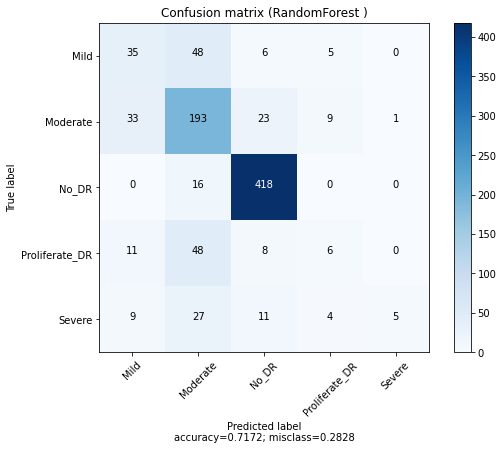

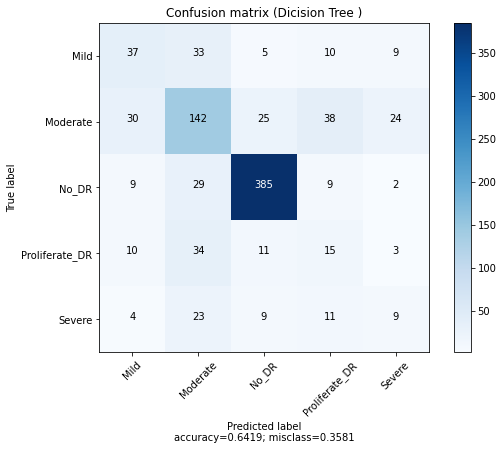

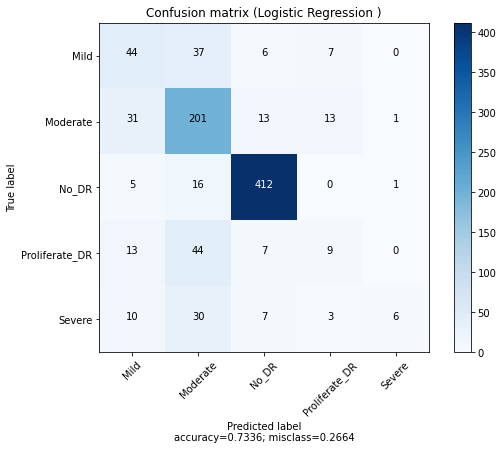

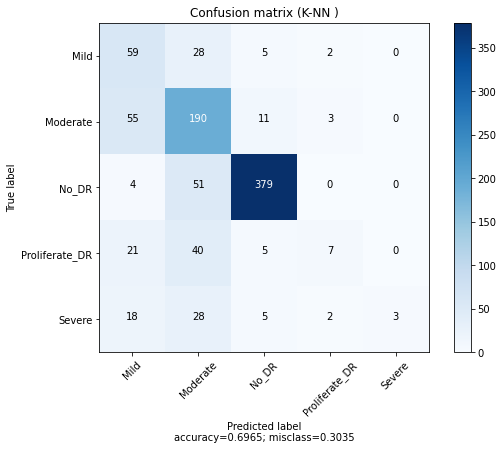

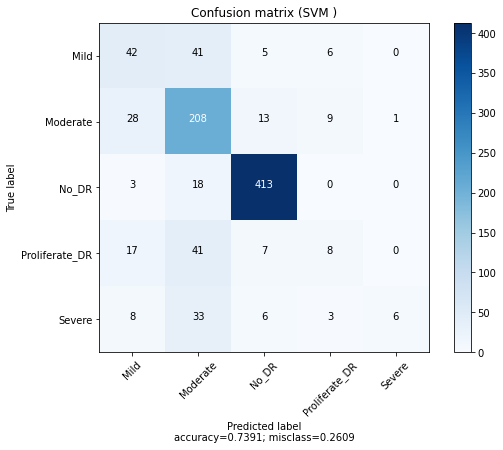

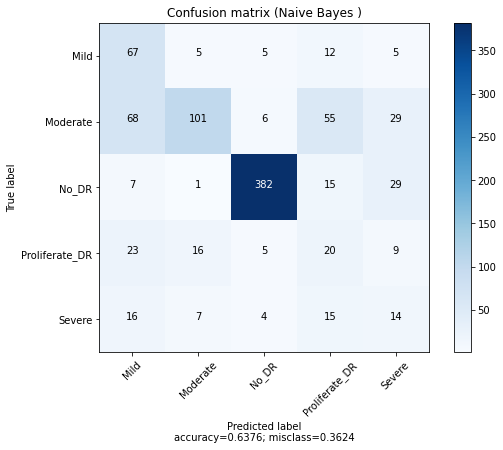

In [ ]:
classes = ["Mild","Moderate","No_DR","Proliferate_DR","Severe"]
for i in range(0,len(Classifier)):
  plot_confusion_matrix(CM[i],classes,Accuracy[i]/100,Classifier[i])


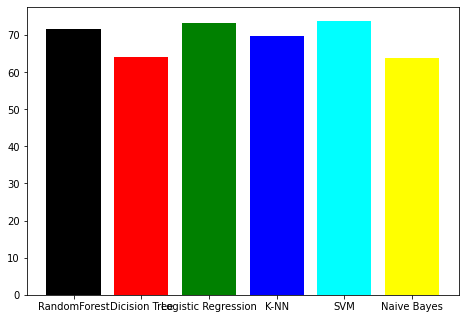

In [ ]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Classifier,Accuracy,color=['black', 'red', 'green', 'blue', 'cyan','yellow'])
plt.show()